In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [34]:
df=pd.read_csv(r"C:\Users\Nomitech\Desktop\Machine learning\gld_price_data.csv")

In [35]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [36]:
#Getting some Basic information

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [38]:
#Checking the missing values

In [39]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [40]:
df.describe()
#getting some statistical information

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [41]:
correlation = df.corr()

In [42]:
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


### Correlation notation

We describe correlations with a unit-free measure called the correlation coefficient which ranges from -1 to +1 and is denoted by r. Statistical significance is indicated with a p-value. Therefore, correlations are typically written with two key numbers: r = and p = .

The closer r is to zero, the weaker the linear relationship.
Positive r values indicate a positive correlation, where the values of both variables tend to increase together.
Negative r values indicate a negative correlation, where the values of one variable tend to increase when the values of the other variable decrease.


In [43]:
##Contructing a heatmap

<AxesSubplot:>

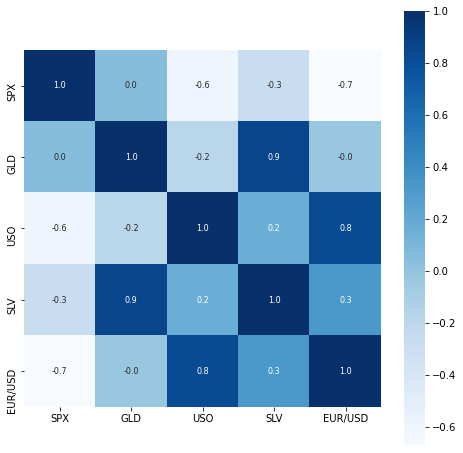

In [44]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8} ,cmap='Blues')

In [45]:
#Checking Distribution

C:\Users\Nomitech\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

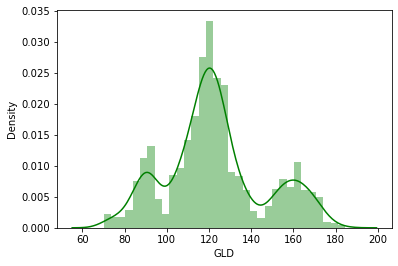

In [46]:
sns.distplot(df['GLD'],color='green')
#the the majority of data are around the mean 

In [47]:
#Splitting the Features and Target Variable

In [48]:
x = df.drop(['Date','GLD'],axis=1)
y = df['GLD']

In [49]:
x

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [26]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [29]:
#Splitting into Training and Test Set

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

###  Model Training

In [51]:
#We train the data with the features and the target variable
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(x_train,y_train)


RandomForestRegressor()

In [52]:
regressor.predict(x_test)

array([168.69069975,  82.09239979, 116.08750058, 127.73550066,
       120.76100063, 154.6969972 , 150.28819892, 126.00010008,
       117.53879877, 126.06670022, 116.57080137, 172.10980101,
       141.79679832, 167.94739848, 115.10769987, 117.88620033,
       138.06850436, 170.16270102, 159.36260277, 159.29699942,
       155.10729973, 125.00250019, 175.22840054, 157.30330432,
       125.18920042,  93.74489976,  77.00440046, 120.45900027,
       119.07379974, 167.4883994 ,  88.14690058, 125.15659985,
        91.18360077, 117.858     , 121.00989877, 136.62220118,
       115.65800109, 114.96030084, 146.83479921, 107.17170066,
       104.53990261,  87.09109779, 126.52920043, 117.98910023,
       152.99669911, 119.60510011, 108.50329967, 108.18189821,
        93.12860038, 127.11569807,  74.68110035, 113.62649952,
       121.37350017, 111.05429903, 118.83359888, 120.31969931,
       159.47919989, 167.89940123, 146.91749675,  85.85789887,
        94.39060033,  86.79789918,  90.69470014, 118.90

In [53]:
y_test

903     168.020004
129      81.230003
1787    112.320000
1913    127.589996
2048    119.620003
           ...    
923     166.380005
1693    106.379997
2054    122.239998
658     133.830002
376     102.360001
Name: GLD, Length: 458, dtype: float64

In [54]:
error_score = metrics.r2_score(y_test,regressor.predict(x_test))

In [56]:
print("R Square error : ", error_score)

R Square error :  0.9891225490183052
